<h1> Question 1 </h1>
<p> Write a program to visualize actual derivative (f′
(x)) and forward finite difference approximation
(δ+0.01(x)) of the function sin(x2) in the internal [0,1] </p>

Total error =  0.7431382781068114


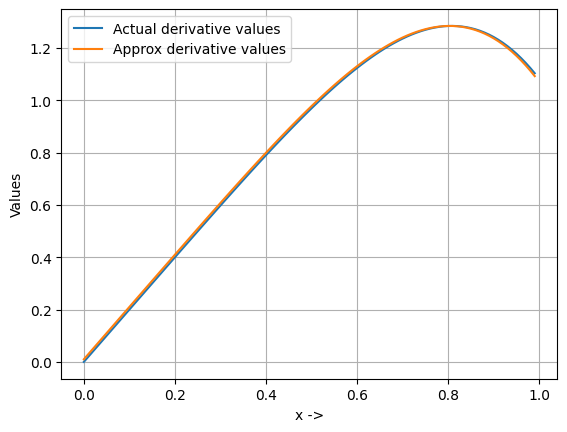

In [35]:
# In this code h is take according to question
import math
import matplotlib.pyplot as plt

def f(x):
    return math.sin(x**2)

def f_dash(x):
    return math.cos(x**2) * 2 * x

def f_double_dash(x):
    return 2*math.cos(x**2) - 4 * (x ** 2) * math.sin(x**2)

a, b = 0, 1
h = 10 ** -2

x_values = []
actual_values = []
approx_values = []

x = a
error = 0
step = 0.01
while x <= b:
    x_values.append(x)
    y1 = f_dash(x)
    actual_values.append(y1)
    y2 = (f(x+h) - f(x)) / h
    approx_values.append(y2)
    x += step
    error += abs(y2 - y1)


plt.plot(x_values, actual_values, label = "Actual derivative values")
plt.plot(x_values, approx_values, label = "Approx derivative values")
plt.xlabel("x ->")
plt.ylabel("Values")
plt.legend()
plt.grid()
print("Total error = ", error)
plt.show()

Actual error =  0.07434707775133376
Theoretical error =  0.11427539277133517


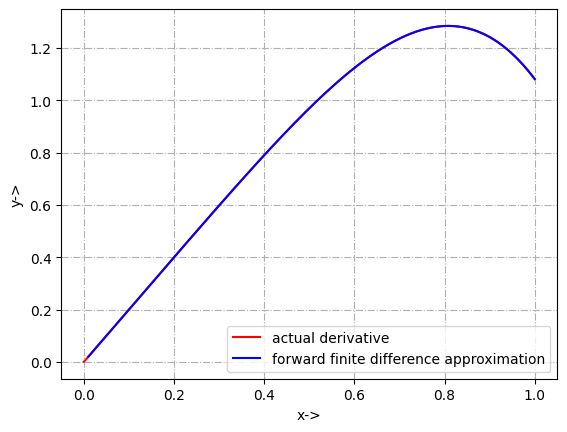

In [43]:
# taking different h

import math
import matplotlib.pyplot as plt

def f(x):
    return math.sin(x**2)

def f_dash(x):
    return 2*x*math.cos(x**2)

def f_double_dash(x):
    return 2*math.cos(x**2) - 4*(x**2)*math.sin(x**2)

a = 0
b = 1
step = (b-a)/10000

# plotting actual derivative from 0 to 1
x = a
x_values = []
actual_values = []
while x <= b:
    x_values.append(x)
    actual_values.append(f_dash(x))
    x += step
plt.plot(x_values, actual_values, color = 'r', label = 'actual derivative')

# plotting finite forward finite difference approximation
x = a
x_values = []
approx_values = []
h = step/10           # note: h should be less than step (reason: the points you choose to plot should be more far than h (makes sense))
while x <= b:
    x_values.append(x)
    approx_values.append((f(x+h) - f(x))/h)
    x += step
plt.plot(x_values[100:], approx_values[100:], color = 'b', label = 'forward finite difference approximation')

# Actual error
print("Actual error = ", sum([abs(actual_values[i] - approx_values[i]) for i in range(len(x_values))]))

# Theoretical error 
# error = (h/2) f_double_dash($) where $ is the point in [a, b] where f_double_dash(x) is maximum in [a, b]
# note that f_double_dash(x) should be bounded for this to happen
max_x = -1
max_value = float('-inf')
for i in range(len(x_values)):
    if max_value < abs(f_double_dash(x_values[i])):
        max_value = abs(f_double_dash(x_values[i]))
        max_x = x_values[i]
print("Theoretical error = ", (h/2)*max_value*len(x_values)) # for each point the error is (h/2)*f_double_dash($)

plt.grid(linestyle = '-.')
plt.legend()
plt.xlabel("x->")
plt.ylabel("y->")
plt.show()

____________________________________________________________________________________

<h1> Question 2 </h1>
Write a program to visualize the absolute errors of approximation δ+0.01(x), δ−0.01(x) and δc0.01(x)
of function sin(x2) in the internal [0,1].

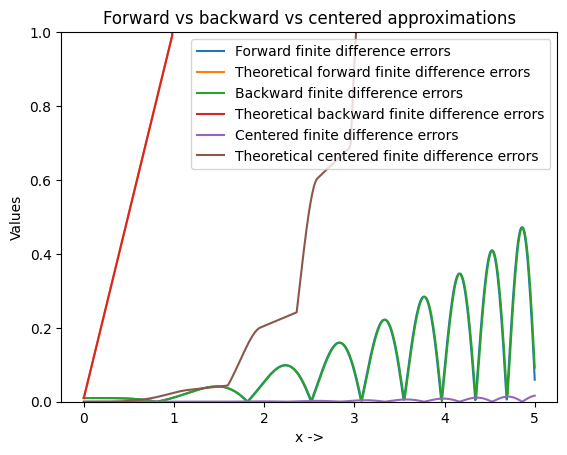

In [49]:

import math
import matplotlib.pyplot as plt

def f(x):
    return math.sin(x**2)

def f_dash(x):
    return 2*x*math.cos(x**2)

def f_double_dash(x):
    return 2*math.cos(x**2) - 4*(x**2)*math.sin(x**2)

def f_triple_dash(x):
    return (-4) * x * (3*math.sin(x**2) + 2*(x**2)*math.cos(x**2))

a, b = 0, 5
h = 10 ** -2

x_values = []
forward_errors = []
backward_errors = []
centered_errors = []

theoretical_forward_errors = []
theoretical_backward_errors = []
theoretical_centered_errors = []

max_f_double_dash_value = 0
max_f_triple_dash_value = 0

x = a
step = 0.01
while x <= b:
    x_values.append(x)
    y = f_dash(x)
    max_f_double_dash_value = max(max_f_double_dash_value, abs(f_double_dash(x)))
    max_f_triple_dash_value = max(max_f_triple_dash_value, abs(f_triple_dash(x)))

    y1 = (f(x+h) - f(x)) / h
    forward_errors.append(abs(y1 - y))
    theoretical_forward_errors.append((h/2)*max_f_double_dash_value*len(x_values))

    y2 = (f(x) - f(x-h))/h
    backward_errors.append(abs(y2 - y))
    theoretical_backward_errors.append((h/2)*max_f_double_dash_value*len(x_values))

    y3 = (f(x+h) - f(x-h))/(2*h)
    centered_errors.append(abs(y3 - y))
    theoretical_centered_errors.append((h**2/6)*max_f_triple_dash_value*len(x_values))
    x += step

plt.plot(x_values, forward_errors, label = "Forward finite difference errors")
plt.plot(x_values, theoretical_forward_errors, label = "Theoretical forward finite difference errors")

plt.plot(x_values, backward_errors, label = "Backward finite difference errors")
plt.plot(x_values, theoretical_backward_errors, label = "Theoretical backward finite difference errors")

plt.plot(x_values, centered_errors, label = "Centered finite difference errors")
plt.plot(x_values, theoretical_centered_errors, label = "Theoretical centered finite difference errors")

plt.legend()
plt.xlabel("x ->")
plt.ylabel("Values")
plt.ylim(0, 1)
plt.title("Forward vs backward vs centered approximations")
plt.show()

________________

<h1> Question 3 </h1>
Write a program to visualize, as a function of h, the maximum absolute error of approximations
δ+
h (x) and δch(x) of function sin(x2) in the internal [0,1]. In the same figure, also plot the
theoretical maximum absolute error of approximations δ+
h (x) and δch(x). 

10.80155268319306 61.227315429213455


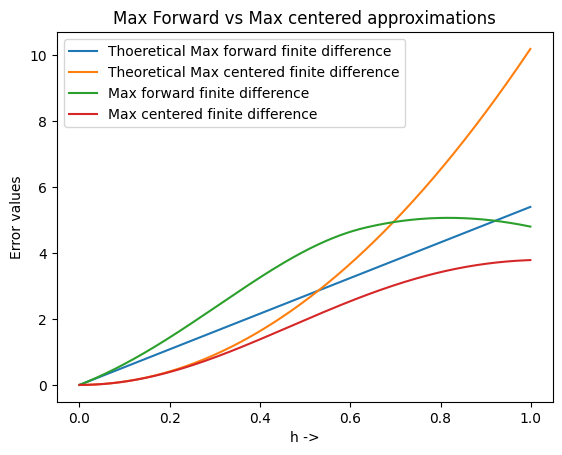

In [79]:
a, b = 0, 2
step = 10 ** -3

# Maximum values of derivatives
x = a
max_f_double_dash = 0
max_f_triple_dash = 0

while x <= b:
    max_f_double_dash = max( abs(f_double_dash(x)), max_f_double_dash )
    max_f_triple_dash = max( abs(f_triple_dash(x)), max_f_triple_dash)
    x += step

print(max_f_double_dash, max_f_triple_dash)
h_values = []
max_errors = []

# calculating values
h = 10**-6
max_forward_error_values = []
max_centered_error_values = []

forward_theoretical_values = []
centered_theoretical_values = []
while h <= 1:
    x = a

    max_forward_error = 0
    max_centered_error = 0

    while x <= b:
        y = f_dash(x)
        # forward errors
        y1 = (f(x+h) - f(x)) / h
        max_forward_error = max(abs(y1-y), max_forward_error)
        
        # centered errors
        y3 = (f(x+h) - f(x-h))/(2*h)
        max_centered_error = max(abs(y3-y), max_centered_error)
        
        x += 0.001

    forward_theoretical_values.append(h/2*max_f_double_dash)
    centered_theoretical_values.append(h*h/6*max_f_triple_dash)

    max_forward_error_values.append(max_forward_error)
    max_centered_error_values.append(max_centered_error)

    h_values.append(h)
    h += 10**-3

plt.plot(h_values, forward_theoretical_values, label = "Thoeretical Max forward finite difference")
plt.plot(h_values, centered_theoretical_values, label = "Theoretical Max centered finite difference")
plt.plot(h_values, max_forward_error_values, label = "Max forward finite difference")
plt.plot(h_values, max_centered_error_values, label = "Max centered finite difference")

plt.legend()
plt.xlabel("h ->")
plt.ylabel("Error values")
plt.title("Max Forward vs Max centered approximations")

plt.show()  

Question 4 <br/>
Write a program to visualize, as a function of M (number of intervals), area under the curve
y(x) = 2x·ex2
in the interval [1,3] computed using the trapezoidal formula. In the figure, also
indicate the exact area. 

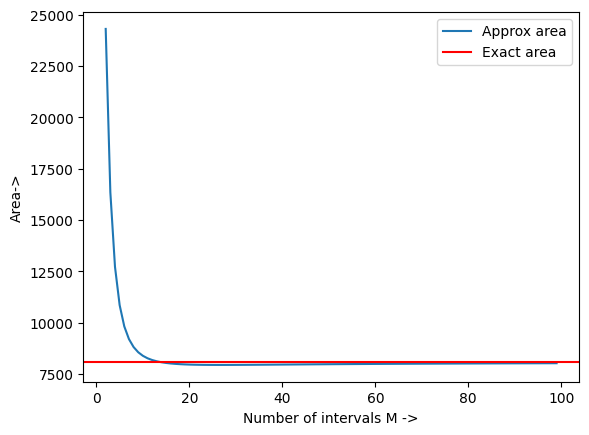

In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x*math.exp(x**2)

def I(x):
    return math.exp(x**2)

a, b = 1, 3
approx_areas = []
sample_points = 100
for M in range(2, sample_points):
    x_points = np.linspace(a, b, M)
    area = 0
    h = (b-a)/(2*M)
    for i in range(1, M):
        area += h*(f(x_points[i]) + f(x_points[i-1]))
    approx_areas.append(area)
exact_area = I(3) - I(1)
plt.plot([i for i in range(2, sample_points)], approx_areas, label = 'Approx area')
plt.axhline(y = exact_area, color = 'red', label = 'Exact area')
plt.legend()
plt.xlabel("Number of intervals M ->")
plt.ylabel("Area->")

plt.show()


Question 5 <br/>
Write a program to visualize, as a function of u, area under the curve y(x) = 2x ·ex2
in the
interval [0,u] computed using various integration functions available in Python’s scipy.integrate
module. In the figure, also indicate the actual area under the curve.

/tmp/ipykernel_1838396/953742906.py:23: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  romberg_area_values.append(romberg(f, a, u))    # romberg will return area from a to u
/tmp/ipykernel_1838396/953742906.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simps_area_values.append(simps(y_values, x_values))


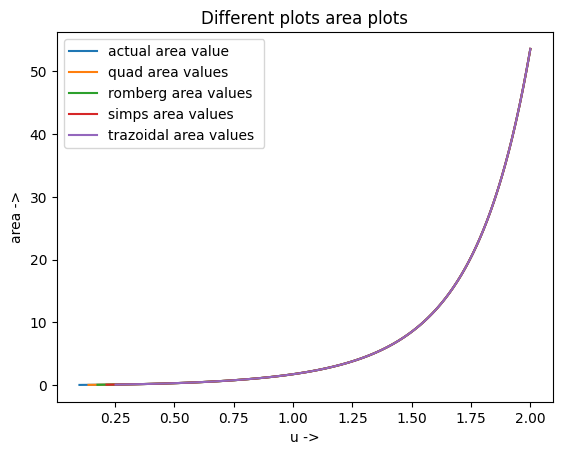

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.integrate import simps
from scipy.integrate import trapezoid

f = lambda x: 2*x*np.exp(x**2)          # function
I = lambda x: np.exp(x**2)              # integration

a = 0
u_values = np.linspace(0.1, 2, 1000)
actual_area_values = []
quad_area_values = []
romberg_area_values = []
simps_area_values = []
trapezoid_area_values = []

for u in u_values:
    # consider interval a to u
    actual_area_values.append(I(u) - I(a))
    quad_area_values.append(quad(f, a, u)[0])       # quad will return tuple area, error
    romberg_area_values.append(romberg(f, a, u))    # romberg will return area from a to u
    x_values = np.linspace(a, u, 1000)
    y_values = f(x_values)
    simps_area_values.append(simps(y_values, x_values))
    trapezoid_area_values.append(trapezoid(y_values, x = x_values))

plt.plot(u_values, actual_area_values, label = 'actual area value')
plt.plot(u_values[20:], quad_area_values[20:], label = 'quad area values ')
plt.plot(u_values[40:], romberg_area_values[40:], label = 'romberg area values ')
plt.plot(u_values[60:], simps_area_values[60:], label = 'simps area values ')
plt.plot(u_values[80:], trapezoid_area_values[80:], label = 'trazoidal area values ')

plt.xlabel('u ->')
plt.ylabel('area ->')
plt.title('Different plots area plots')
plt.legend()
plt.show()

<h1> Question 6 </h1>
Add a method derivative that will return the polynomial’s derivative. <br/>
Add a method area that takes two arguments a and b, and returns the exact area under
the polynomial in the interval [a, b] <br/>

In [7]:
import copy
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, coeff):
        self.coeff = coeff
        self.n = len(coeff)

    def __len__(self):
        return self.n
    
    def __str__(self):
        ans = "Coefficients of the polynomial are:\n"
        for ele in self.coeff:
            ans += str(ele) + " "
        ans += "\n"
        return ans
    
    def __add__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and  j < len(p2):
            ans.append(self.coeff[i] + p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(p2.coeff[j])
            j += 1
        return Polynomial(ans)

    def __sub__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for -: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and j < len(p2):
            ans.append(self.coeff[i] - p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(-p2.coeff[j])
            j += 1
        return Polynomial(ans)
    
    def __truediv__(self, num):
        return Polynomial([ele/num for ele in self.coeff])
    
    def __mul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __rmul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __getitem__(self, num):
        if type(num) != int and type(num) != float:
            raise TypeError("Unsupported operand for [] : '{}' and '{}'".format(type(self).__name__, type(num).__name__))
        return sum( [self.coeff[i]* (num**i) for i in range(self.n)])
    
    def fitViaMatrixMethod(self, points):
        a = []
        b = []
        n = len(points)
        for x, y in points:
            a.append([x**i for i in range(n)])
            b.append(y)
        a = np.array(a)
        n = np.array(b)
        self.coeff = list(np.linalg.solve(a, b))
        self.n = len(self.coeff)

        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return

    
    def phi_j(self, j, points, n):
        # n is number of points
        numerator = Polynomial([1]) # initialized like this for ease
        denominator = 1
        xj, yj = points[j]
        for i in range(n):
            xi, yi = points[i]
            if i != j:
                numerator  = numerator*Polynomial([-xi, 1])
                denominator *= (xj - xi)
        return numerator/denominator
        
    def fitViaLagrangePoly(self, points):
        n = len(points)
        ans = Polynomial([]) 
        for j in range(n):
            xj, yj = points[j]
            ans = ans + yj * self.phi_j(j, points, n)
        
        self.coeff = ans.coeff
        self.n = len(ans.coeff)
        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return
    
    def show(self, a, b):
        step = 0.25/2

        plt.plot([a + step*i for i in range(int((b-a)/step) + 1)], [ self[a + step*i]  for i in range(int((b-a)/step) + 1)])
        plt.xlabel("x ->")
        plt.ylabel("value (y)")
        plt.title("Plotting polynomial from " +  str(a) + " to " + str(b))
        plt.grid()
        plt.show()

    def derivative(self):
        new_coeff = []
        for i in range(1, self.n):
            new_coeff.append(i*self.coeff[i])
        return Polynomial(new_coeff)
    
    def area(self, a, b):
        new_coeff = [0, ]
        for i in range(self.n):
            new_coeff.append(self.coeff[i]/(i+1))
        I = Polynomial(new_coeff)
        return "Area in the interval [" + str(a) + ", " + str(b) + "] is : " + str(I[b] - I[a])


In [8]:
p = Polynomial([1, 2, 3])
pd = p.derivative()
print(pd)

Coefficients of the polynomial are:
2 6 



In [9]:
p = Polynomial([1, 2, 3])
print(p.area(1,2))

Area in the interval [1, 2] is : 11.0


____________